In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('dirty_sample_500.csv')

In [4]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,6253,L53432,L,300.8,310.3,1538.0,36.1,198.0,0,0,0,0,0,0
1,4685,M19544,M,303.6,311.8,1421.0,44.8,101.0,1,0,0,0,0,0
2,1732,M16591,M,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0
3,4743,L51922,L,303.3,311.3,1592.0,33.7,14.0,0,0,0,0,0,0
4,4522,L51701,L,302.4,310.4,1865.0,23.9,129.0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      460 non-null    float64
 4   Process temperature [K]  460 non-null    float64
 5   Rotational speed [rpm]   460 non-null    float64
 6   Torque [Nm]              460 non-null    float64
 7   Tool wear [min]          460 non-null    float64
 8   Machine failure          500 non-null    int64  
 9   TWF                      500 non-null    int64  
 10  HDF                      500 non-null    int64  
 11  PWF                      500 non-null    int64  
 12  OSF                      500 non-null    int64  
 13  RNF                      500 non-null    int64  
dtypes: float64(5), int64(7), o

In [6]:
df.isna().sum()

UDI                         0
Product ID                  0
Type                        0
Air temperature [K]        40
Process temperature [K]    40
Rotational speed [rpm]     40
Torque [Nm]                40
Tool wear [min]            40
Machine failure             0
TWF                         0
HDF                         0
PWF                         0
OSF                         0
RNF                         0
dtype: int64

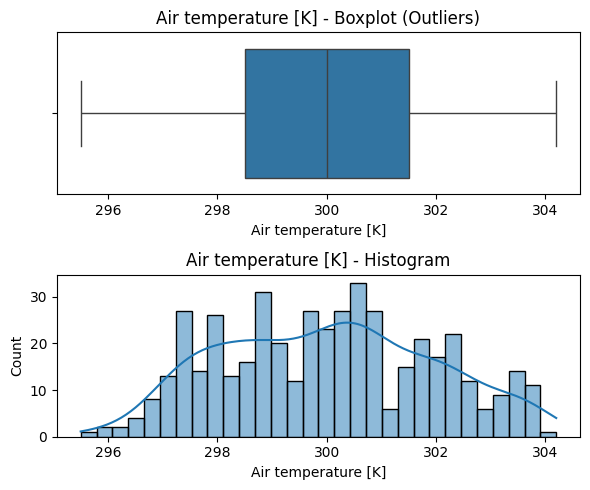

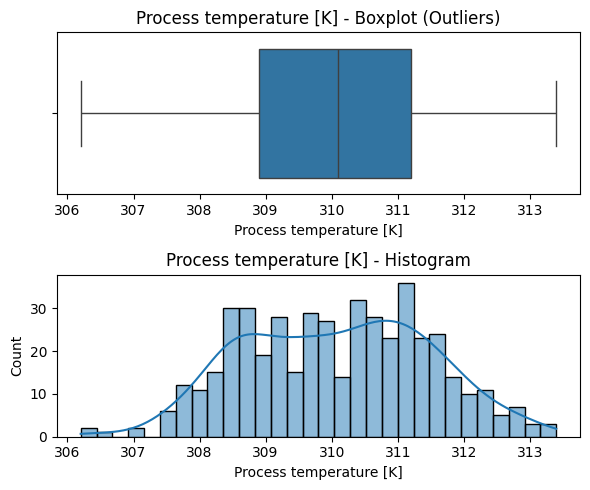

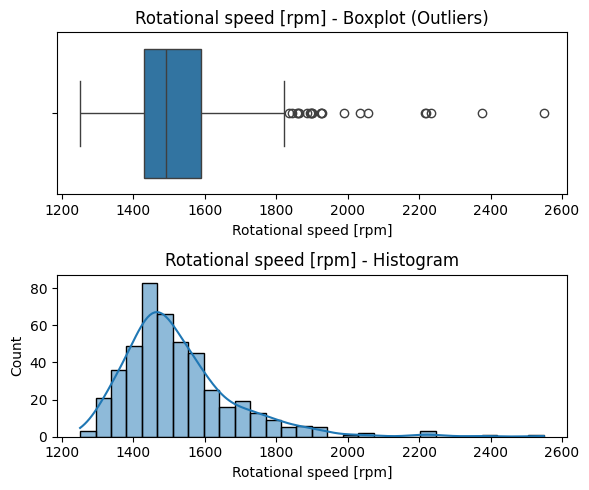

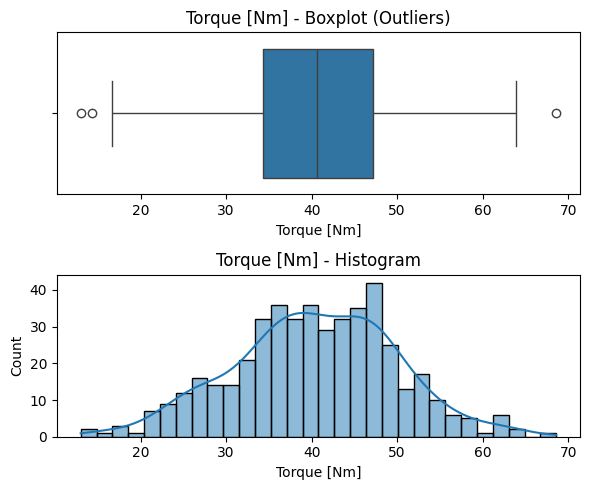

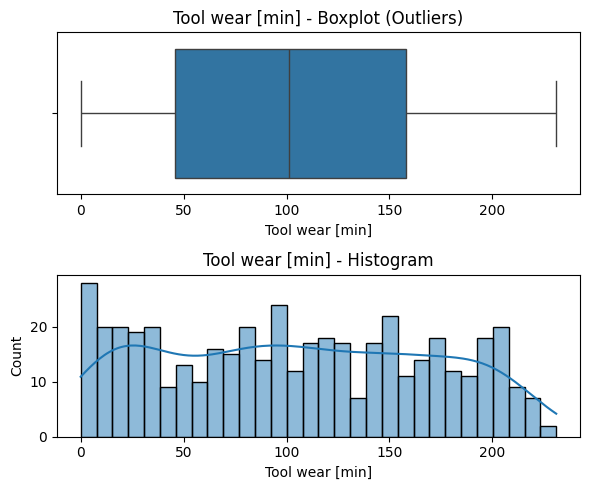

In [7]:
numberics_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

for col in numberics_cols:
    fig, axes = plt.subplots(2, 1, figsize=(6, 5))  # 2 hàng, 1 cột
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"{col} - Boxplot (Outliers)")

    # Histogram
    sns.histplot(x=df[col], ax=axes[1], bins=30, kde=True)
    axes[1].set_title(f"{col} - Histogram")

    plt.tight_layout()
    plt.show()

In [8]:
df['Type'].unique()

array(['L', 'M', 'H', 'L ', '??', 'h', 'm', 'HIGH'], dtype=object)

In [9]:
df['Type'].value_counts(normalize=True)

Type
L       0.640
M       0.266
H       0.084
L       0.002
??      0.002
h       0.002
m       0.002
HIGH    0.002
Name: proportion, dtype: float64

In [10]:
failure_rate = df.groupby('Type')['Machine failure'].mean()
failure_rate 

Type
??      0.000000
H       0.047619
HIGH    0.000000
L       0.034375
L       0.000000
M       0.030075
h       0.000000
m       0.000000
Name: Machine failure, dtype: float64

In [11]:
df.drop(['Type'], axis=1, inplace=True)

Drop cột Type, đóng góp dự đoán thấp, loại bỏ để đơn giản mô hình


In [12]:
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

Ko có giá trị dự đoán

In [13]:
df.drop(['TWF','HDF','PWF','OSF','RNF'], axis=1, inplace=True)

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1

In [14]:
list(df)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [15]:
df['Machine failure'].value_counts()

Machine failure
0    483
1     17
Name: count, dtype: int64

Imbalanced nặng

In [16]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

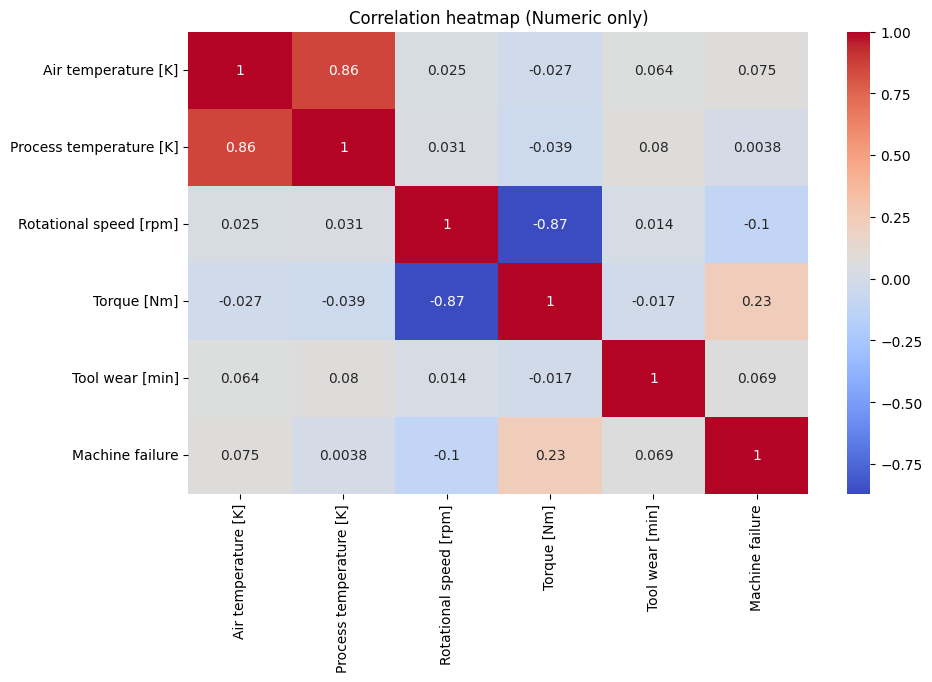

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation heatmap (Numeric only)")
plt.show()

# Cleaning Data

## Missing values
## Outleirs

In [19]:
num_cols = df.select_dtypes(include=['float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [27]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


df[col] = df[col].clip(lower_bound, upper_bound)

In [28]:
print(df.isnull().sum())  # Kiểm tra còn missing không
print(df.describe())      # Xem lại dữ liệu sau khi xử lý

Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
dtype: int64
       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count           500.000000               500.000000              500.000000   
mean            300.015000               310.068600             1514.626500   
std               1.856634                 1.336295              122.803662   
min             295.500000               306.200000             1251.000000   
25%             298.600000               309.000000             1436.500000   
50%             300.000000               310.100000             1491.000000   
75%             301.300000               311.000000             1577.250000   
max             304.200000               313.400000             1788.375000   

       Torque [Nm]  Tool wear [min]  Machine failure  
count   500.000000       500.000000       500.

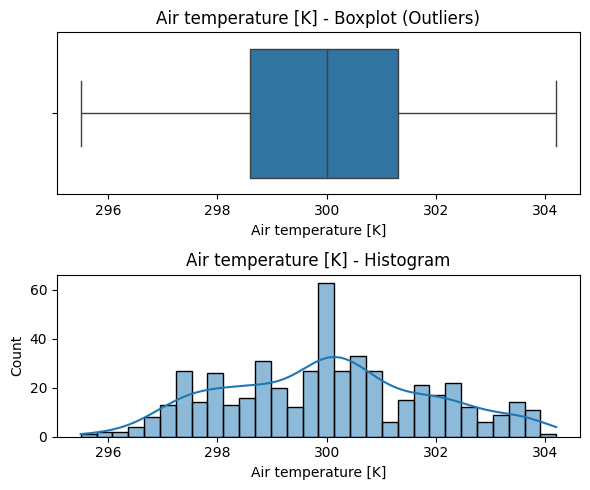

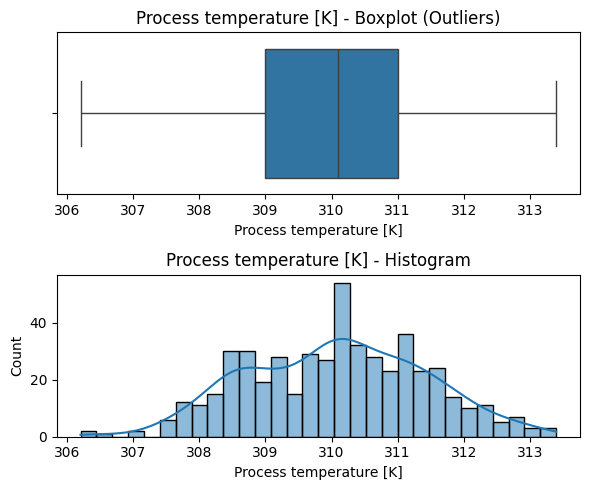

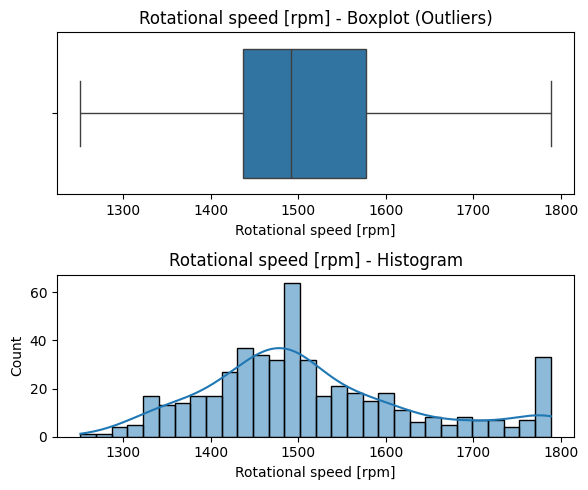

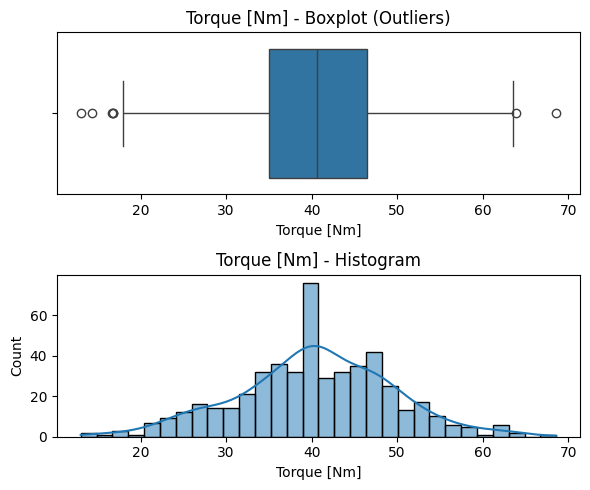

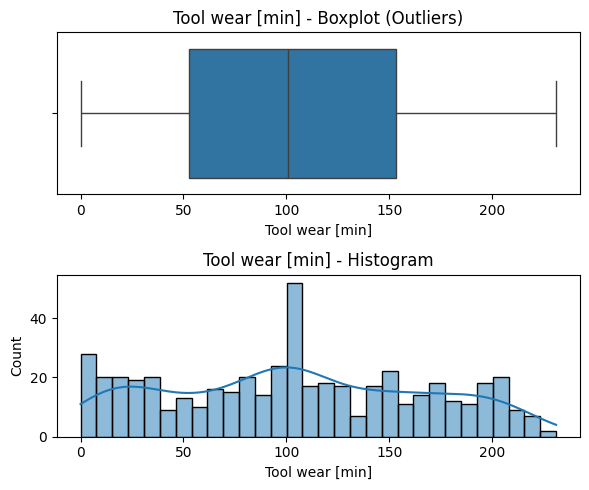

In [29]:
for col in numberics_cols:
    fig, axes = plt.subplots(2, 1, figsize=(6, 5))  # 2 hàng, 1 cột
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axes[0])
    axes[0].set_title(f"{col} - Boxplot (Outliers)")

    # Histogram
    sns.histplot(x=df[col], ax=axes[1], bins=30, kde=True)
    axes[1].set_title(f"{col} - Histogram")

    plt.tight_layout()
    plt.show()

In [26]:
col = 'Rotational speed [rpm]'
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Upper bound:", upper_bound)
print("Giá trị lớn nhất trước clip:", df[col].max())

# Clip
df[col] = df[col].clip(lower_bound, upper_bound)
print("Giá trị lớn nhất sau clip:", df[col].max())


Upper bound: 1788.375
Giá trị lớn nhất trước clip: 2549.0
Giá trị lớn nhất sau clip: 1788.375
